In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data_bca.xlsx to data_bca.xlsx


In [ ]:
# Reading files after upload
dataframe = pd.read_excel('data_bca.xlsx')

In [ ]:
dataframe.shape

(28522, 11)

In [ ]:
# Extract the required columns
data = dataframe[['content','at','score']]

In [ ]:
#Rename columns
data = data.rename(columns={'content':'Comment', 'at':'Date'})

In [ ]:
data

,Comment,Date,score
0,Halo Kenapa Dengan Waktu Malam Di Atas Jam 23....,2024-12-03 03:02:08,3
1,memudahkan untuk segala transaksi mantap,2024-12-03 02:13:24,5
2,Bagus,2024-12-03 01:23:51,5
3,Selamat pagi bapak/ibu mohon maaf kenapa saya ...,2024-12-03 00:55:12,4
4,Semoga berkelimpahan terus saldo saya,2024-12-03 00:21:31,5
...,...,...,...
28517,"Update apa""an ini woy , gue dari kmrin gk bisa...",2024-01-01 02:37:30,1
28518,Tolong pihak BCA mobile segera cari solusinya ...,2024-01-01 02:19:50,5
28519,"Jelek banget ,,!!! Pake bca mobile setiap mau ...",2024-01-01 01:24:09,1
28520,Dulu aplikasi mbanking bca dibanding mbanking ...,2024-01-01 01:10:06,1


### We will label the sentiment negative/positive based on the rating score given

In [ ]:
data['score'].value_counts()

,count
score,
5,11757
1,11008
2,2118
3,2115
4,1524


In [ ]:
# labeling data
# Then scores 1-3 will be labeled negative and score 4-5 will be labeled positive
data['label'] = data['score'].apply(lambda x: 'Positif' if x >= 4 else 'Negatif')

In [ ]:
data.drop('Date', axis=1, inplace=True)

In [ ]:
data.head()

,Comment,score,label
0,Halo Kenapa Dengan Waktu Malam Di Atas Jam 23....,3,Negatif
1,memudahkan untuk segala transaksi mantap,5,Positif
2,Bagus,5,Positif
3,Selamat pagi bapak/ibu mohon maaf kenapa saya ...,4,Positif
4,Semoga berkelimpahan terus saldo saya,5,Positif


###Get the dummy variable for value

In [ ]:
df = pd.DataFrame(data)

In [ ]:
# Create a dummy variable
dummy = pd.get_dummies(df['label'],prefix='label')

In [ ]:
# Concatenate dataframes
df = pd.concat([df, dummy], axis=1)

In [ ]:
df[['label_Negatif', 'label_Positif']] = df[['label_Negatif', 'label_Positif']].astype(int)

In [ ]:
df

,Comment,score,label,label_Negatif,label_Positif
0,Halo Kenapa Dengan Waktu Malam Di Atas Jam 23....,3,Negatif,1,0
1,memudahkan untuk segala transaksi mantap,5,Positif,0,1
2,Bagus,5,Positif,0,1
3,Selamat pagi bapak/ibu mohon maaf kenapa saya ...,4,Positif,0,1
4,Semoga berkelimpahan terus saldo saya,5,Positif,0,1
...,...,...,...,...,...
28517,"Update apa""an ini woy , gue dari kmrin gk bisa...",1,Negatif,1,0
28518,Tolong pihak BCA mobile segera cari solusinya ...,5,Positif,0,1
28519,"Jelek banget ,,!!! Pake bca mobile setiap mau ...",1,Negatif,1,0
28520,Dulu aplikasi mbanking bca dibanding mbanking ...,1,Negatif,1,0


###see the proportion of negative and positive label data

In [ ]:
# Aggregate numbers by sentiment using sum
sentiment_prop = df.groupby(['label']).sum(numeric_only=True).drop(columns='score')

In [ ]:
sentiment_prop

,label_Negatif,label_Positif
label,,
Negatif,15241,0
Positif,0,13281


In [ ]:
#Count the total number of comments
total_comments = len(df)

In [ ]:
# Compute the proportion
sentiment_prop['Proportion'] = sentiment_prop.sum(axis=1) / total_comments
# Reset index
sentiment_prop.reset_index(inplace=True)

In [ ]:
sentiment_prop

,label,label_Negatif,label_Positif,Proportion
0,Negatif,15241,0,0.534359
1,Positif,0,13281,0.465641


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-47-f0811f92eaa9>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




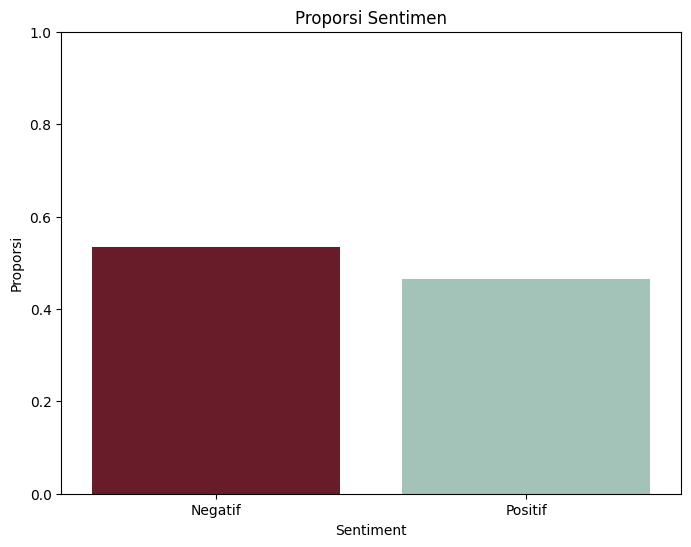

In [ ]:
colors = {'Positif': '#9EC8B9' , 'Negatif': '#750E21'}
# Visualization using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='label', y='Proportion', data=sentiment_prop, palette=colors)
plt.title('Proporsi Sentimen')
plt.ylabel('Proporsi')
plt.xlabel('Sentiment')
plt.ylim(0, 1)  # Batas y dari 0 hingga 1
plt.show()

In [ ]:
#grouping data
sentiment_counts = data.groupby(by='label', as_index=False).agg(Total=('label','count'))

In [ ]:
sentiment_counts

,label,Total
0,Negatif,15241
1,Positif,13281


In [ ]:
import plotly.express as px

In [ ]:
# Create a Bar Chart for Sentiment Proportions (Positive & Negative)
fig = px.bar(
    sentiment_counts,  # Data untuk Bar Chart
    x='label',  # Kategori Sentimen (Positif/Negatif)
    y='Total',  # Total jumlah untuk setiap Sentimen
    color='label',  # Warna berdasarkan Sentimen
    color_discrete_sequence=['#750E21', '#9EC8B9'],  # Warna untuk Sentimen (Negatif dan Positif)
    title='<b>Proporsi Sentimen Pelanggan</b><br><sup>Lebih dari setengah responden merasa pelayanan <span style="color:#750E21;">tidak memuaskan</span>',
    labels={'Total': 'Jumlah Review', 'Sentiment': 'Sentimen'},  # Label untuk sumbu X dan Y
    text='Total'  # Menampilkan nilai total pada batang grafik
)

# Atur tampilan label dan judul
fig.update_traces(
    textposition='outside',  # Menampilkan nilai total di luar batang
    hovertemplate='<b>%{x}</b><br>%{y} Review'  # Menampilkan informasi saat hover
)

# Atur layout grafik
fig.update_layout(
    width=500,  # Lebar grafik
    height=450,  # Tinggi grafik
    showlegend=False,  # Menyembunyikan legend
    title=dict(
        text='<b>Proporsi Sentimen Pelanggan</b><br><sup>Lebih dari setengah responden merasa pelayanan <span style="color:#750E21;">tidak memuaskan</span>',
        font=dict(size=20),
        y=0.95,
        x=0.5
    ),
    xaxis_title='Sentimet',  # Judul sumbu X
    yaxis_title='Jumlah Review'  # Judul sumbu Y
)

# Menampilkan grafik
fig.show()

In [ ]:
from wordcloud import WordCloud

In [ ]:
all_text = ' '.join(word for word in df['Comment'])

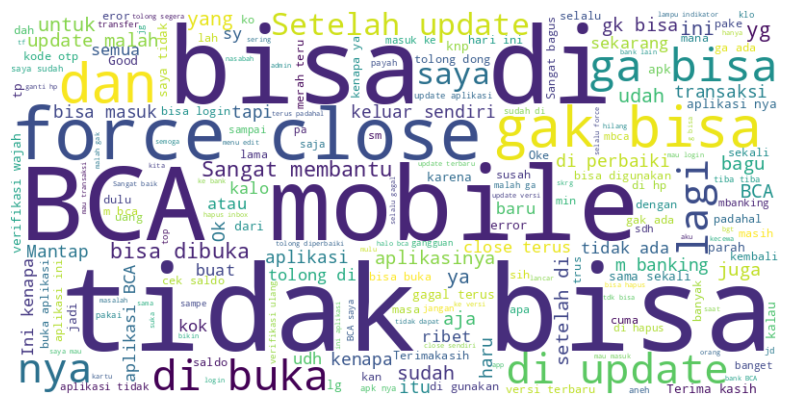

In [ ]:
# Create word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Show a word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.show()
